# Wrangling and Analyze Data - Project 2

**Name:** Michael Owusu Agyebeng\
**Description:** Udacity Student

## Table of Contents
1. Introduction
2. Data Gathering
3. Assessing data
4. Cleaning data
5. Analyzing and visualizing data


## Introduction
As part of Udacity’s Data Science course, I have to wrangle and analyze WeRateDogs posts on twitter. This involves gathering data from twitter using Twitter API and combining it with data from a URL and a csv file to form one grand file called twitter_archive_master.csv an perfom analysis on it to provide meaningful results

## Data Gathering

In [43]:
#import useful packages
import tweepy
from tweepy import OAuthHandler
import numpy as np
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import requests

In [44]:
#Loading archive document
df = pd.read_csv('twitter-archive-enhanced.csv')

# Import the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [45]:
# Load files from Udacity's website
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df.tweet_id.values
len(tweet_ids)

In [43]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [ ]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list orf dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
new_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

## Assessing data

In [ ]:
new_df.info()

In [ ]:
img_df.info()

In [ ]:
df.info()

In [ ]:
img_df.head()

In [ ]:
new_df.head()

In [ ]:
df.name.value_counts()

In [ ]:
sum(img_df.jpg_url.duplicated())

In [46]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [47]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [48]:
new_df.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,6959,33648,"[0, 85]"
1,892177421306343426,5263,29193,"[0, 138]"
2,891815181378084864,3463,21947,"[0, 121]"
3,891689557279858688,7174,36702,"[0, 79]"
4,891327558926688256,7707,35100,"[0, 138]"


## Errors
**Quality**
1. tweet_id must be a string not an integer
2. retweeted_status_id is not a float but a string
3. retweeted_status_user_id is not a float but a string
4. timestamp is a date not a string
5. in_reply_to_status_id is not a float but a string
6. in_reply_to_user_id is also not a float but a string
7. replies could also mean duplicates so we will have to drop them
8. retweets in df data hence there are duplicates so we have to Drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp
9. dog names in the img_df data were in different cases
10. some dogs names are "a", "None", "the", etc


**tidiness** 
1. html tags in source column of df data
2. doggo, floofer, pupper and puppo columns need to be merged


## Cleaning data

In [49]:
# Create a Copy of all three data
img_df_cln = img_df.copy()

df_cln = df.copy()

new_df_cln = new_df.copy()

### Quality Issues

## Issue 1
#### Define
- tweet_id must be a string not an integer

#### Code

In [50]:
df_cln.tweet_id = df_cln.tweet_id.astype(str)
img_df_cln.tweet_id = img_df_cln.tweet_id.astype(str)
new_df_cln.tweet_id = new_df_cln.tweet_id.astype(str)

#### Test

In [51]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Issue 2 & 3
#### Define
- retweeted_status_id is not a float
- retweeted_status_user_id is not a float
> since after changing the type, they becomes difficult to drop, I would leave them like this and drop them later

## Issue 4
#### Define
- timestamp is a date not a string

#### Code

In [52]:
df_cln.timestamp = pd.to_datetime(df_cln.timestamp)

#### Test

In [53]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## Issue 5 & 6
#### Define
- in_reply_to_status_id is not a float but a string
- in_reply_to_user_id is also not a float but a string
> since after changing the type, they becomes difficult to drop, I would leave them like this and drop them later

## Issue 7
#### Define
-  replies could also mean duplicates so we will have to drop them

#### Code

In [54]:
#filter only retweeted_status_id that is null to remove duplicates
df_cln = df_cln[df_cln.in_reply_to_status_id.isnull()]
df_cln.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1,inplace=True)

#### Test

In [55]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2278 non-null   object             
 1   timestamp                   2278 non-null   datetime64[ns, UTC]
 2   source                      2278 non-null   object             
 3   text                        2278 non-null   object             
 4   retweeted_status_id         181 non-null    float64            
 5   retweeted_status_user_id    181 non-null    float64            
 6   retweeted_status_timestamp  181 non-null    object             
 7   expanded_urls               2274 non-null   object             
 8   rating_numerator            2278 non-null   int64              
 9   rating_denominator          2278 non-null   int64              
 10  name                        2278 non-null   object          

## Issue 8
#### Define
- retweets in df data hence there are duplicates

#### Code

In [56]:
#filter only retweeted_status_id that is null to remove duplicates
df_cln = df_cln[df_cln.retweeted_status_id.isnull()]
df_cln.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1,inplace=True)

#### Test

In [57]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

## Issue 9
#### Define
- dog names in the img_df data were in different cases

#### Code

In [58]:
img_df_cln['p1'] = img_df_cln['p1'].str.capitalize()
img_df_cln['p2'] = img_df_cln['p2'].str.capitalize()
img_df_cln['p3'] = img_df_cln['p3'].str.capitalize()

#### Test

In [59]:
img_df_cln.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False


## Issue 10
#### Define
- some dogs names are "a", "None", "the", etc, so we have to change them to "None"

#### Code

In [60]:
#create a list of invalid dog names so that we can change them 
invalid=[]

#make a loop to find these words then create the list
for name in df_cln.name:
# all names in lower cases are possibly invalid names so we would find them
    if name.islower():
        invalid.append(name)
        
print(invalid)

['such', 'a', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'a', 'very', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


In [61]:
#replacing the invalids with none using for loop
for name in invalid:
    df_cln.name.replace(name,"None", inplace=True)

#### Test

In [62]:
#checking if any of the names is invalid
sum(df_cln.name.isin(invalid))

0

### Tidyness issues

## Issue 1
#### Define
- seperate html tags from urls
eg. <a href="http://twitter.com/download/iphone" rel=""nofollow"">Twitter for iPhone</a>	

#### Code

In [63]:
# create lists to store html and urls
source_list =[]
url_list = []

for source in df_cln.source:
    url_list.append(source.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[0] )
    source_list.append(source.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[1] )
df_cln.source = source_list 

df_cln = pd.concat([df_cln, pd.DataFrame(url_list, columns = ['source_link'])], axis = 1)

#### Test

In [64]:
df_cln.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_link
675,789530877013393408,2016-10-21 18:16:44+00:00,Twitter for iPhone,This is Rizzy. She smiles a lot. 12/10 contagi...,https://twitter.com/dog_rates/status/789530877...,12.0,10.0,Rizzy,None,None,None,None,http://twitter.com/download/iphone
1902,674644256330530816,2015-12-09 17:38:19+00:00,Twitter for iPhone,When you see sophomores in high school driving...,https://twitter.com/dog_rates/status/674644256...,11.0,10.0,None,None,None,None,None,http://twitter.com/download/iphone
186,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
986,749064354620928000,2016-07-02 02:17:13+00:00,Twitter for iPhone,Meet Winston. He's pupset because I forgot to ...,https://twitter.com/dog_rates/status/749064354...,11.0,10.0,Winston,None,None,None,None,http://twitter.com/download/iphone
1871,675147105808306176,2015-12-11 02:56:28+00:00,Twitter for iPhone,When you're presenting a group project and the...,https://twitter.com/dog_rates/status/675147105...,10.0,10.0,None,None,None,None,None,http://twitter.com/download/iphone


## Issue 2
#### Define
- doggo, floofer, pupper and puppo columns need to be merged

#### Code

In [65]:
cols = df_cln[['doggo','floofer','pupper','puppo']]
cols = cols.replace('None', '') 
stage = np.array(cols['doggo']) + np.array(cols['floofer']) + np.array(cols['pupper']) + np.array(cols['puppo'])
pd.DataFrame(stage, columns = ['stage']).stage.value_counts()


                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

In [66]:
# Fixing the dogs with two classifications.
stage[stage == 'doggopupper'] = 'doublestage'
stage[stage == 'doggofloofer'] = 'doublestage'
stage[stage == 'doggopuppo'] = 'doublestage'
# concatinating the stage column to the df_cln dataset
df_cln = pd.concat([df_cln, pd.DataFrame(stage, columns = ['stage'])], axis = 1)

In [67]:
# drop merged columns
df_cln.drop(['doggo','floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [68]:
df_cln.stage.value_counts()

               1761
pupper          221
doggo            72
puppo            23
doublestage      11
floofer           9
Name: stage, dtype: int64

## Analyzing and Visualizing data

#### Merging the datasets
- merge df_cln and img_df_cln the add new_df_cln to form the tidymaster dtataset

#### Code

In [69]:
merge_df= pd.merge(df_cln, img_df_cln, on='tweet_id')

In [70]:
tidymaster= pd.merge(merge_df, new_df_cln, on='tweet_id')
tidymaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1954 non-null   object             
 1   timestamp           1954 non-null   datetime64[ns, UTC]
 2   source              1954 non-null   object             
 3   text                1954 non-null   object             
 4   expanded_urls       1954 non-null   object             
 5   rating_numerator    1954 non-null   float64            
 6   rating_denominator  1954 non-null   float64            
 7   name                1954 non-null   object             
 8   source_link         1703 non-null   object             
 9   stage               1948 non-null   object             
 10  jpg_url             1954 non-null   object             
 11  img_num             1954 non-null   int64              
 12  p1                  1954 non-null 

## Storing data

In [71]:
tidymaster.to_csv('twitter_archive_master.csv', index=False)

### Top 10 dog breeds

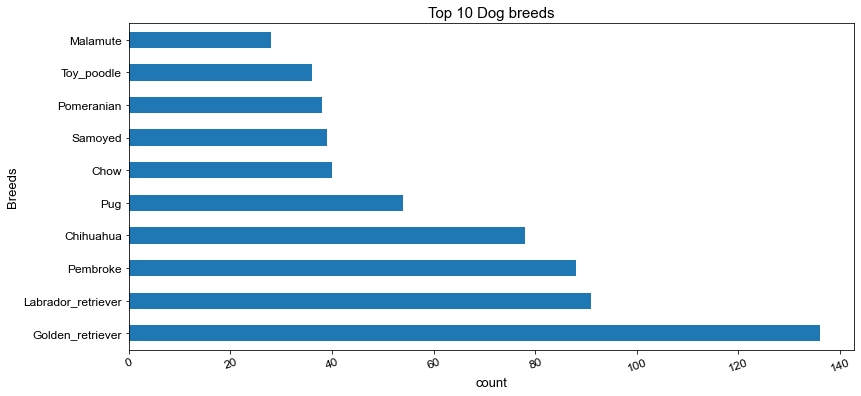

In [72]:
#plot a barchart
tidymaster.p1.value_counts().iloc[:10].plot(kind='barh',figsize=(13,6),fontsize=12)

#create the title and the labels 
plt.title("Top 10 Dog breeds",fontsize=15)
plt.xticks(rotation=20)
plt.ylabel("Breeds",fontsize= 13)
plt.xlabel("count",fontsize= 13)
sns.set_style("whitegrid")

> Golden retrievers  had the majority mentions in the tweets

### Top 10 dog names

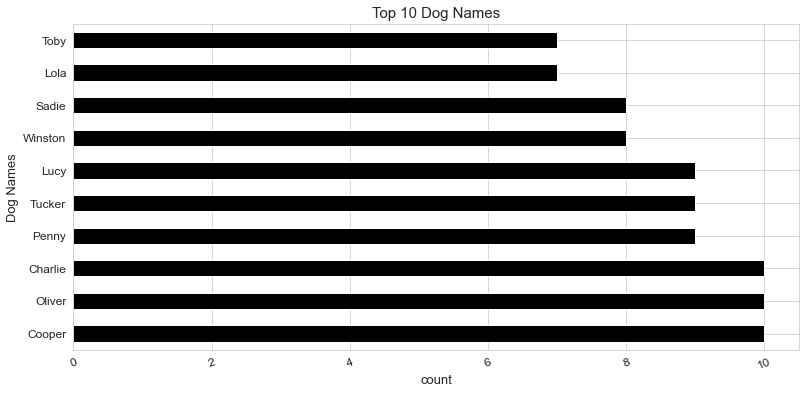

In [73]:
#plot a barchart
tidymaster.name.value_counts().iloc[1:11].plot(kind='barh',figsize=(13,6),fontsize=12, color='black')
# we started from 1 since we did not want to include None, which accounts for most of the dognames in the data

#create the title and the labels 
plt.title("Top 10 Dog Names",fontsize=15)
plt.xticks(rotation=20)
plt.ylabel("Dog Names",fontsize= 13)
plt.xlabel("count",fontsize= 13)
sns.set_style("whitegrid")

> There was a tie in the most common name which are Oliver, Charlie, and Cooper

### What is the number of posts per month?

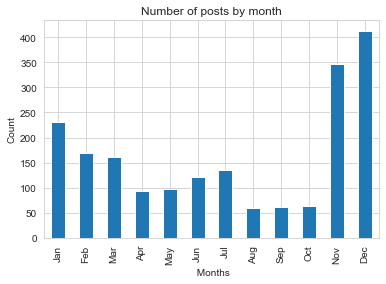

In [74]:
months= ['Jan','Feb','Mar','Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x= np.arange(len(months))

tidymaster.tweet_id.groupby(tidymaster["timestamp"].dt.month).count().plot(kind='bar')
plt.title('Number of posts by month')
plt.ylabel('Count')
plt.xlabel(' Months')
plt.xticks(x, months)
plt.savefig('ret_fav')

> We can see from the graph that whiles December had the most tweets,it wwas follwed closely by the preceeding month, November, and  August had the least

### Which day had the most posts?

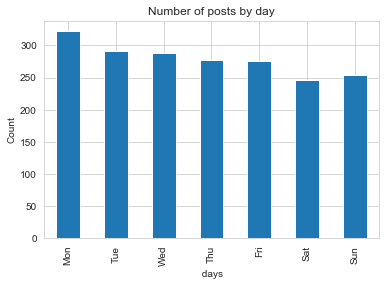

In [75]:
days= ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
i= np.arange(len(days))
tidymaster.tweet_id.groupby(tidymaster["timestamp"].dt.weekday).count().plot(kind='bar')
plt.title('Number of posts by day')
plt.ylabel('Count')
plt.xlabel(' days')
plt.xticks(i, days)
plt.savefig('ret_fav')

> Evidently Monday had the most post of all, but the deviation is not too large among the others

### Are retweets correlated with favorites

(0.9286883811425174, 0.0)

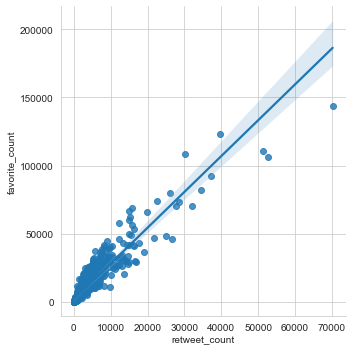

In [76]:
# Retweets correlated to favorites

sns.lmplot(x='retweet_count', y='favorite_count', data=tidymaster);
from scipy import stats
stats.pearsonr(tidymaster['retweet_count'], tidymaster['favorite_count'])

> From the data, retweets of a dog tweet is positively correlated to the favorites of that tweet with a coefficient of 0.929 which is a very strong relationship

### from which source were these dog posts generated

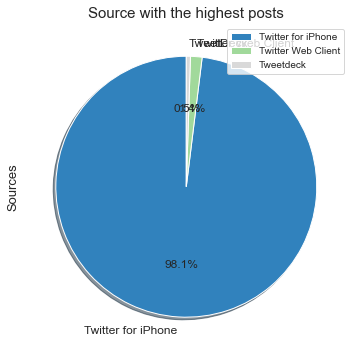

In [77]:
countsource= tidymaster.source.value_counts()
#plot a piechart
countsource.plot(kind= 'pie',figsize = (13,6),fontsize=12,
        colormap='tab20c',autopct='%1.1f%%', shadow=True, startangle=90) #for beauty

plt.title("Source with the highest posts",fontsize=15)
plt.ylabel("Sources",fontsize= 13)
plt.legend(('Twitter for iPhone', 'Twitter Web Client','Tweetdeck'))
sns.set_style("whitegrid")

> Obviously, most of our tweets came from iPhones giving 98.1% of our tweets

### compare the engagements (retweets and favorites) count over time 

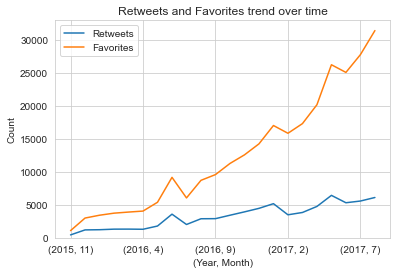

In [78]:
tidymaster.retweet_count.groupby([tidymaster["timestamp"].dt.year, tidymaster["timestamp"].dt.month]).mean().plot(kind='line')
tidymaster.favorite_count.groupby([tidymaster["timestamp"].dt.year, tidymaster["timestamp"].dt.month]).mean().plot(kind='line').set_ylim(0, )
plt.title('Retweets and Favorites trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))

> Retweet and favorite counts were low in November 2015 but rose significantly after 2 years. Thoough Retweet count did not grow as much, Faovorites count grew exponentially. summing up the fact that more people were interested in the WeRateDogs content

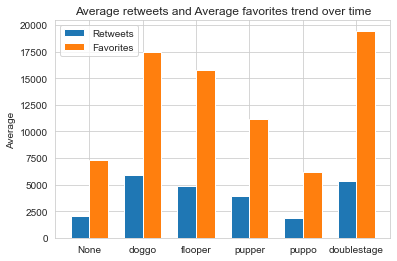

In [80]:
labels= ['None','doggo','flooper','pupper','puppo','doublestage']
width = 0.35  # the width of the bars
x= np.arange(len(labels))

retweetmeans = tidymaster.groupby('stage').retweet_count.mean()
favoritemeans = tidymaster.groupby('stage').favorite_count.mean()

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, retweetmeans, width, label='Retweets')
rects2 = ax.bar(x + width/2, favoritemeans, width, label='Favorites')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title('Average retweets and Average favorites trend over time')
plt.ylabel('Average')
plt.xticks(x, labels)
plt.legend(('Retweets', 'Favorites'))

plt.show()

> Generally Pupper had less engagements (ie. Retweets and Favorites) whiles doublesatge had the mojority Favorite count